<a href="https://colab.research.google.com/github/Jinzhao-Yu/BioStat615/blob/main/BIOSTAT615_Lecture_13_Fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOSTAT615 Lecture 13 - R

## 1. Bootstrapping with Bivariate Normal

Given data, number of bootstraps, and the estimator, we can estimate bias, standard errors, and confidence intervals

In [1]:
#' boot.inferences() - Infer bootstrap estimates
#' @param dat - Data 
#' @param B - Size of boostreap
#' @param estimator - Function to estimate the parameter
#' @return A list with parameter(theta_est), bias, se, and, boostrap estimates (theta_b_est)
boot.inferences <- function(dat,B,estimator){
  theta_est <- estimator(dat) ## estimate with original data
  ## obtain bootstrap estimates  
  theta_b_est <- replicate(B,estimator(dat,sample(1:nrow(dat),size=nrow(dat),replace = TRUE)))
  bias <- mean(theta_b_est)-theta_est ## evaluate bias
  se <- sd(theta_b_est)  # evaluate SI
  CI <- quantile(theta_b_est,prob=c(0.025,0.975)) ## evaluate confidence intervals
  return(list(est=theta_est,bias=bias,se=se,CI=CI, theta_b_est = theta_b_est))
}

We will use bivariate normal distribution as an example to simulate data

In [2]:
#' Simulate bivariate normal
#' @param n - number of observations to sample
#' @param rho - correlation coefficient
#' @param sigma_x, sigma_y - marginal stdev of x, y
#' @return (n * 2) matrix of bivariate normal distribution
r.bivar.norm <- function(n = 20,rho=0.5,sigma_x=1, sigma_y=2){
  Sigma = matrix(c(sigma_x^2, sigma_x*sigma_y*rho,sigma_x*sigma_y*rho,sigma_y^2),nrow=2,ncol=2)
  U = chol(Sigma)
  Z = matrix(rnorm(n*2),nrow=n,ncol=2)
  X = Z%*%U
  return(X)
}

A simple estimator of correlation coefficient is directly estimating sample correlation coefficient

In [3]:
#' cor.estimator() - Estimator of correlation between two columns
#' @param dat (n*2) matrix
#' @param idx Indices of samples
cor.estimator <- function(dat,idx=1:nrow(dat)){
  return(cor(dat[idx,1],dat[idx,2]))
}

[1] 0.4911564
[1] 0.02287538
[1] 0.1398076
     2.5%     97.5% 
0.2392609 0.7918540 


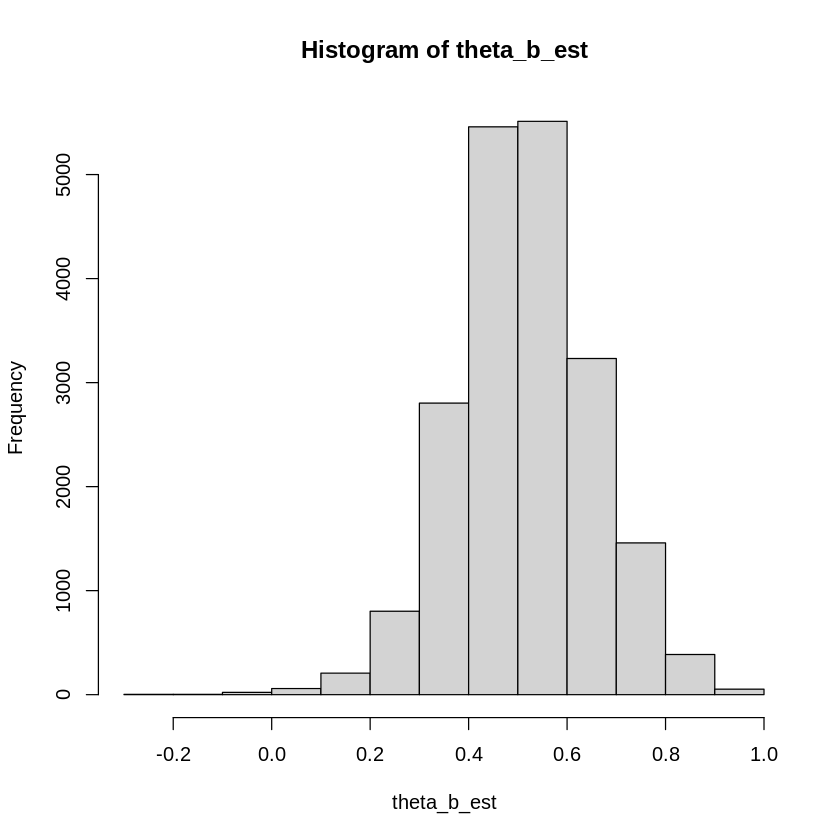

In [4]:
dat <- r.bivar.norm(20,rho=0.5)
set.seed(1000)
boot_res <- boot.inferences(dat,B=20000,cor.estimator)
with(boot_res,{
  print(est)
  print(bias)
  print(se)
  print(CI)
  hist(theta_b_est)
})

## 2. Bootstrap vs. Empirical Distribution

In [5]:
## Obtain empirical distribution from generating function
set.seed(1000)
theta_est_dist <- replicate(20000,cor.estimator(r.bivar.norm(20,rho=0.5)))

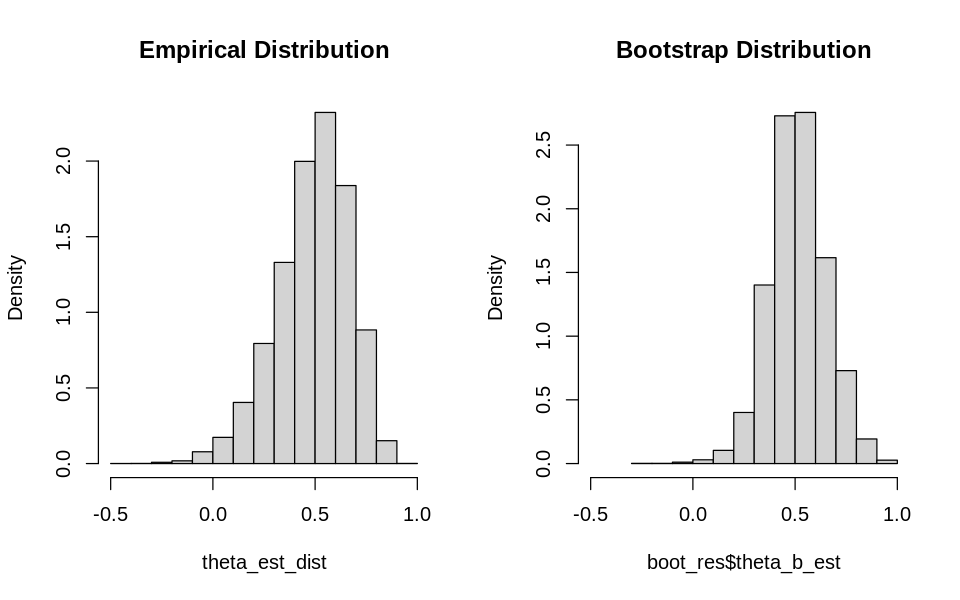

In [6]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfcol=c(1,2))
hist(theta_est_dist,main="Empirical Distribution",prob=TRUE,xlim=c(-0.5,1.0))
hist(boot_res$theta_b_est,main="Bootstrap Distribution",prob=TRUE,xlim=c(-0.5,1.0))